

### Fraud Fortification: Unleashing Machine Learning to Safeguard Financial Transactions

#### Investigating the impact of different machine learning algorithms and parameter tuning on model performance could be a valuable avenue.

The project revolves around developing a robust fraud detection system for financial transactions. Leveraging advanced machine learning techniques, the system aims to enhance the security of financial transactions by identifying and mitigating fraudulent activities. Through thorough data analysis, visualization, and feature engineering, the model is fine-tuned for optimal performance. The logistic regression model, tuned with the best parameters, showcases exceptional accuracy in distinguishing between genuine and fraudulent transactions. The project not only ensures financial security but also provides valuable insights for future fraud prevention strategies.








The provided data is  related to credit card transactions, particularly focusing on fraud detection. The dataset contains various features (V1, V2, ..., V28) representing anonymized and transformed information, along with the 'Time,' 'Amount,' and 'Class' columns.

In [23]:
!pip install pandas


In [24]:
!python -m pip install --upgrade pip


In [25]:
import pandas as pd

In [26]:
data=pd.read_csv("creditcard.csv")

In [27]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [28]:
import pandas as pd

# Load the dataset
data = pd.read_csv("creditcard.csv")

# Display information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset appears to be related to credit card transactions, as indicated by the column names such as 'Time,' 'V1' through 'V28' representing various features, 'Amount' representing the transaction amount, and 'Class' indicating whether the transaction is fraudulent (1) or not (0). The 'Time' column likely represents the time elapsed since the first transaction.

In the context of fraud detection in credit card transactions, the objective is to build a model that can accurately identify fraudulent transactions based on the features provided in the dataset. The features V1 through V28 are likely transformed or anonymized variables for security and privacy reasons.

Understanding the distribution of the 'Class' variable, which indicates the occurrence of fraud, is crucial for building a reliable fraud detection model. The dataset contains a substantial class imbalance, with a large number of non-fraudulent transactions (Class 0) and a small number of fraudulent transactions (Class 1). This class imbalance needs to be addressed during the preprocessing stage to ensure the model's effectiveness.

In [29]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Describe the data
df.describe()




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Time:
Count: 284,807 transactions recorded.
Mean: The average time elapsed since the first transaction is approximately 94,813.86.
Std (Standard Deviation): The amount of variation in the time values is approximately 47,488.15.
Min: The earliest recorded time is 0.
25% (First Quartile): 25% of transactions occurred before or at 54,201.5 time.
50% (Median): Half of the transactions occurred before or at 84,692.0 time.
75% (Third Quartile): 75% of transactions occurred before or at 139,320.5 time.
Max: The latest recorded time is 172,792.
Amount:
Count: 284,807 transactions recorded.
Mean: The average transaction amount is approximately 88.35.
Std (Standard Deviation): The amount of variation in transaction amounts is approximately 250.12.
Min: The smallest transaction amount is 0.
25% (First Quartile): 25% of transactions have an amount less than or equal to 5.60.
50% (Median): Half of the transactions have an amount less than or equal to 22.00.
75% (Third Quartile): 75% of transactions have an amount less than or equal to 77.17.
Max: The largest transaction amount is 25,691.16.
Class:
Count: 284,807 transactions recorded.
Mean: The average class value is approximately 0.00173.
Std (Standard Deviation): The amount of variation in class values is approximately 0.04153.
Min: The smallest class value is 0 (non-fraudulent transaction).
25% (First Quartile): 25% of transactions are non-fraudulent (Class 0).
50% (Median): Half of the transactions are non-fraudulent (Class 0).
75% (Third Quartile): 75% of transactions are non-fraudulent (Class 0).
Max: The largest class value is 1 (fraudulent transaction).
Other Columns (V1-V28):
Similar statistics for the anonymized features obtained through PCA transformation. These columns have a mean close to 0 and varying levels of standard deviation.

In [30]:
import pandas as pd

# Load your dataset
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)

# Get the shape of the DataFrame
(rows, columns) = df.shape

# Print the shape
print("Number of rows:", rows)
print("Number of columns:", columns)



Number of rows: 284807
Number of columns: 31


In summary, the shape of the DataFrame gives you a quick overview of its size and structure, indicating how many data points and features you have.

The number 284,807 represents the total number of transactions or records in my dataset.
The number 31 represents the total number of columns or features in your dataset, including both the independent features (e.g., time, V1-V28, amount) and the target variable (Class).


In [31]:
duplicates = df[df.duplicated()]
print(duplicates)



            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [32]:
df_no_duplicates = df.drop_duplicates()


In [33]:
import pandas as pd

# Read a CSV file into a DataFrame
df = pd.read_csv('creditcard.csv')

# Perform operations on the DataFrame
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

This information provides an overview of the DataFrame's structure, including the number of rows, columns, non-null entries, data types, and memory usage. In this case, the DataFrame appears to have no missing values, and most columns contain floating-point numbers. The 'Class' column is likely a categorical variable with integer values.
DataFrame Type: class 'pandas.core.frame.DataFrame' indicates that the variable df is a pandas DataFrame.

RangeIndex: RangeIndex: 284807 entries, 0 to 284806 represents the index of the DataFrame, indicating that it has 284,807 entries (rows) ranging from 0 to 284,806.

Data Columns: Data columns (total 31 columns): indicates that the DataFrame has a total of 31 columns.

For each column:

Column Index: The numbers (0 to 30) on the left indicate the index of each column.

Column Name: The names (e.g., 'Time', 'V1', 'V2', ..., 'Amount', 'Class') represent the column names.

Non-Null Count: The number of non-null (non-missing) entries in each column. For example, all columns have 284,807 non-null entries, meaning there are no missing values.

Dtype: The data type of each column. For example, most columns have a data type of float64 (64-bit floating-point number), and the 'Class' column has a data type of int64 (64-bit integer).

Memory Usage: memory usage: 67.4 MB indicates the memory consumed by the DataFrame.







In [35]:
class_distribution = df['Class'].value_counts()
print(class_distribution)


Class
0    284315
1       492
Name: count, dtype: int64


In [36]:
amount_distribution = df['Amount'].value_counts()
print(amount_distribution)


Amount
1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: count, Length: 32767, dtype: int64


Understanding the distribution of transaction amounts can be important for various analyses, such as detecting outliers, identifying common transaction sizes, and making decisions related to fraud detection or anomaly detection.



Correlation Analysis: Investigate correlations between features, especially with the target variable 'Class' in the context of fraud detection.

In [37]:
import pandas as pd

# Load your dataset
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)



            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

## visualization

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


C:\Users\ntsika\AppData\Local\Temp\ipykernel_9876\4193489498.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set1')


Text(0.5, 1.0, 'Class Distribution (0: Non-Fraud, 1: Fraud)')

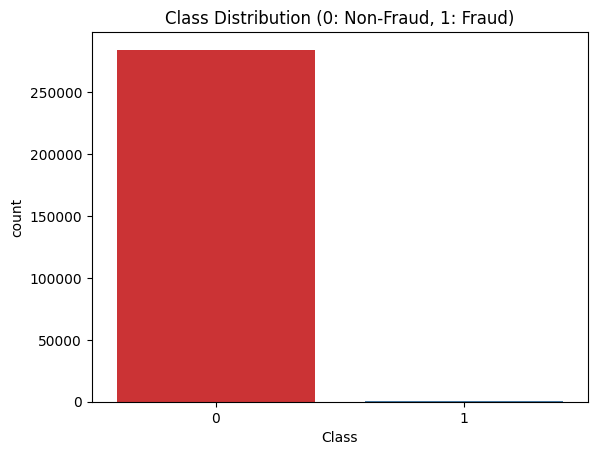

In [39]:
sns.countplot(x='Class', data=df, palette='Set1')
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')


Text(0.5, 1.0, 'Time vs. Amount for Fraudulent Transactions')

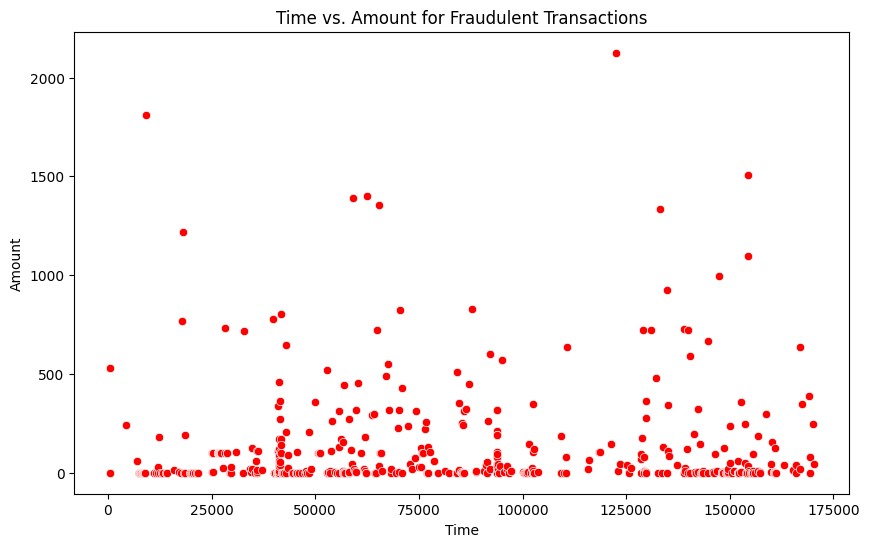

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', data=df[df['Class'] == 1], color='red')
plt.title('Time vs. Amount for Fraudulent Transactions')


Text(0.5, 1.0, 'Correlation Heatmap')

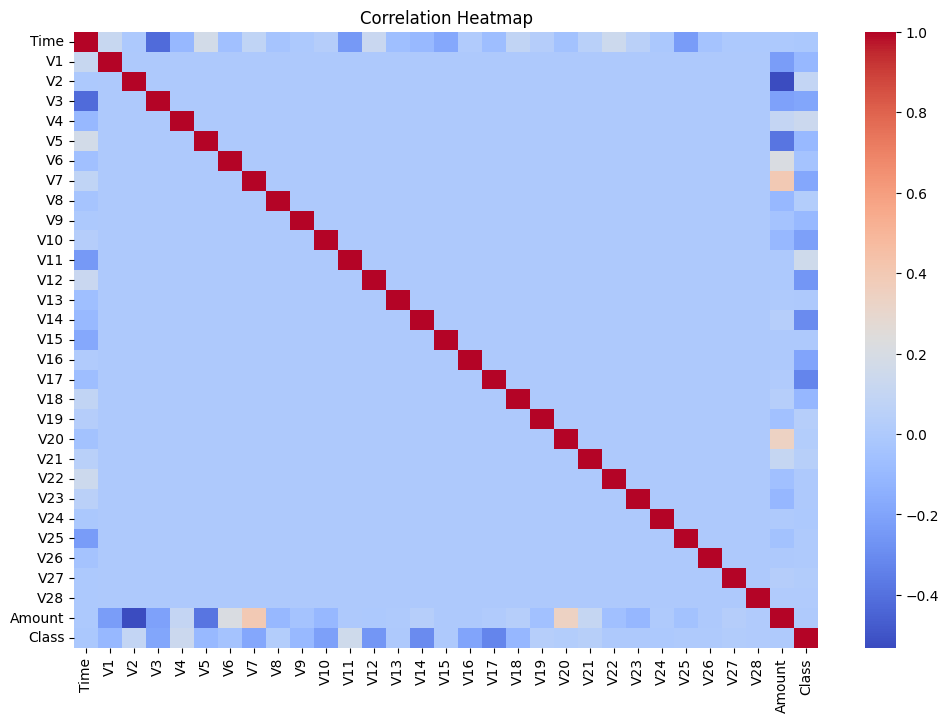

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')


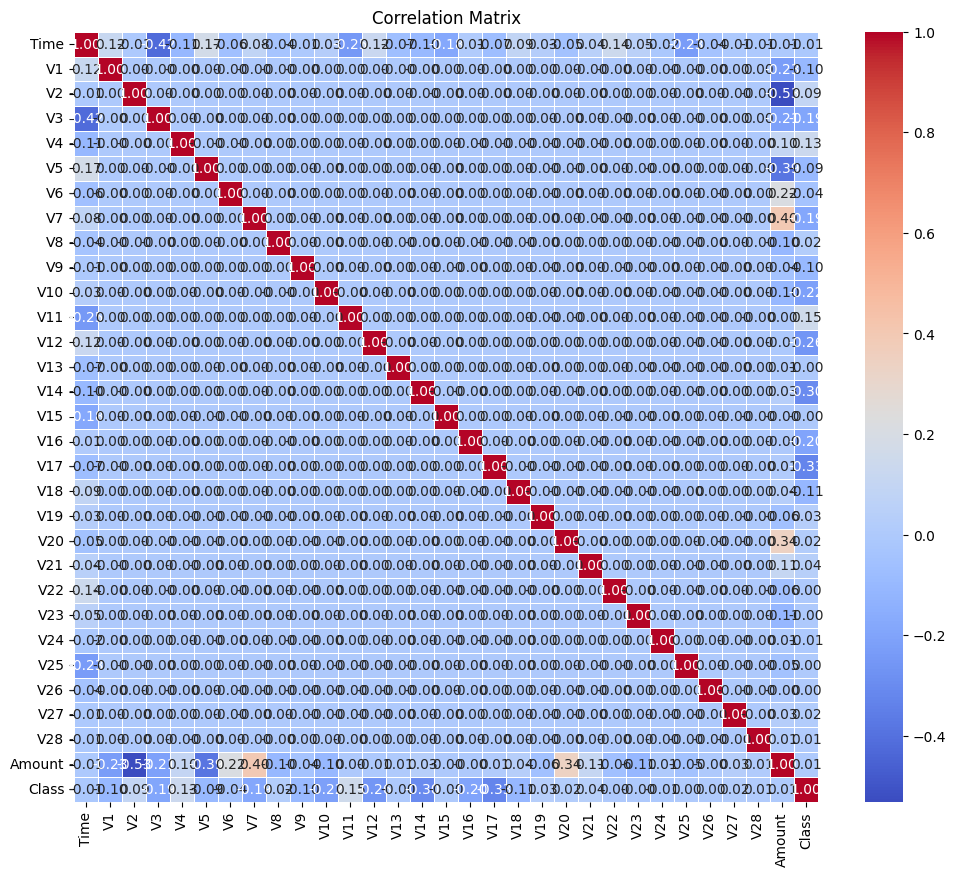

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Add this line

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('creditcard.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualization - Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


### Model  Training

In [43]:
from  sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [44]:
import pandas as pd

# Load your dataset
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)

# Now you can use df in the subsequent code
x = df.drop('Class', axis=1)
y = df['Class']



In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming you have loaded your data into 'df' DataFrame
# Replace 'Class' with the actual name of your target column

# Separate features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)




C:\Users\ntsika\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

This part of the warning indicates that the optimization algorithm (lbfgs in this case) used by logistic regression did not converge within the maximum number of iterations allowed. It means that the algorithm stopped before finding the optimal solution, and the result might not be fully accurate.

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded your data into X and y
# ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Train the model
lr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lr.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9991222218320986


t seems like your logistic regression model achieved a high accuracy of approximately 99.91%. However, keep in mind that accuracy might not be the only metric to consider, especially in imbalanced datasets like credit card fraud detection.

In fraud detection scenarios, where the majority of transactions are non-fraudulent, accuracy can be misleading. Other metrics like precision, recall, and the area under the ROC curve (AUC-ROC) are often more informative.

Consider evaluating your model using these metrics to get a more comprehensive understanding of its performance:

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1])
print("\nROC AUC Score:", roc_auc)


Confusion Matrix:
[[56855     9]
 [   41    57]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962


ROC AUC Score: 0.9747392274298577
